In [1]:
import numpy as np
import csv
import time
import datetime
import h5py
import matplotlib.pyplot as plt
import cv2

The next snippet is used to plot the depth calculated in the script


In [2]:
def exr2depth(path):
    """Read depth image as numpy array

    Args:
        path (str): The path to the file

    Returns:
        ndarray: Returns an array with the shape WxHx1
    """
    if not os.path.isfile(path):
            return None
        
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
    
    # get the maximum value from the array, aka the most distant point
    # everything above that value is infinite, thus i clamp it to maxvalue
    # then divide by maxvalue to obtain a normalized map
    # multiply by 255 to obtain a colormap from the depthmap
    maxvalue = np.max(np.where(np.isinf(img), -np.Inf, img))
    img[img > maxvalue] = maxvalue
    img = img / maxvalue * 255

    img = np.array(img).astype(np.uint8).reshape(img.shape[0], img.shape[1], -1)

    return img

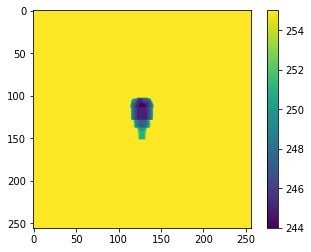

In [13]:
depth_data = exr2depth("C:/dev/tmp/output/object01_depth0120.exr")

fig = plt.figure()
plt.imshow(depth_data)
plt.colorbar()
plt.show()

The next snippet is used to plot the flow

In [4]:
def exr2flow(exr):
    """ converts 1-channel exr-data to 2D numpy arrays """ 
    img = cv2.imread(exr, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

    # Compute the size
    sz = img.shape[:2]

    R, G, B =  img[..., 0], img[..., 1], img[..., 2]

    img = np.zeros((sz[1], sz[0], 3), np.float64)
    img[:,:,0] = np.array(R).reshape(img.shape[0],-1)
    img[:,:,1] = -np.array(G).reshape(img.shape[0],-1)

    hsv = np.zeros((sz[1], sz[0], 3), np.uint8)
    hsv[...,1] = 255

    mag, ang = cv2.cartToPolar(img[...,0], img[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    return img, bgr, mag, ang

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


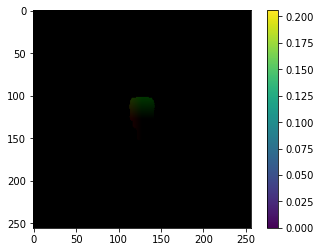

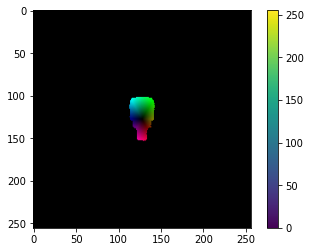

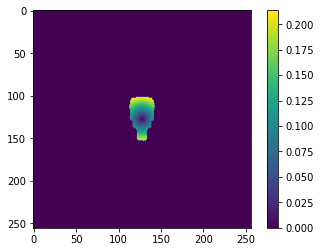

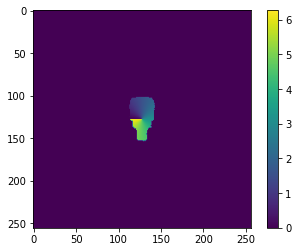

In [5]:
flow_data = exr2flow("C:/dev/tmp/output/object01_flow0120.exr")

for data in flow_data:
    fig = plt.figure()
    plt.imshow(data)
    plt.colorbar()
    plt.show()

The next snippet is used to plot exr images


In [6]:
def exr2normal(path):
    """Read normal map image as numpy array

    Args:
        path (str): The path to the file

    Returns:
        ndarray: Returns an array with the shape WxHx3
    """
    if not os.path.isfile(path):
            return None

    img = cv2.imread(path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

    img[img > 1] = 1
    img[img < 0] = 0
    img = img * 255
    
    img = np.array(img).astype(np.uint8).reshape(img.shape[0], img.shape[1], -1)

    return img

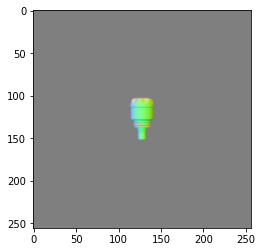

In [10]:
nrm_data = exr2normal("C:/dev/tmp/output/object01_normal0120.exr")

fig = plt.figure()
plt.imshow(nrm_data)
plt.show()

In [8]:
def exr2segmap(path):
    """Read segmentation map image as numpy array

    Args:
        path (str): The path to the file

    Returns:
        ndarray: Returns an array with the shape WxHx1
    """
    if not os.path.isfile(path):
            return None    

    img = cv2.imread(path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

    img = img[..., 0] + img[..., 1] + img[..., 2]
    img[img <= 0] = 0
    img[img > 0] = 1
    img = np.array(img).astype(np.uint8).reshape(img.shape[0], img.shape[1], -1)

    return img

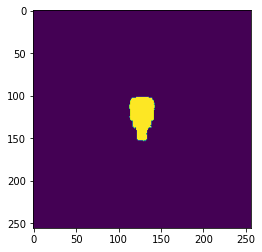

In [11]:
albedo_data = exr2segmap("C:/dev/tmp/output/object01_albedo0120.exr")

fig = plt.figure()
plt.imshow(albedo_data)
plt.show()

In [14]:
def png2rgb(path):
    """Read segmentation map image as numpy array

    Args:
        path (str): The path to the file

    Returns:
        ndarray: Returns an array with the shape WxHx1
    """
    if not os.path.isfile(path):
            return None    

    img = cv2.imread(path)

    return img[:, :, ::-1]

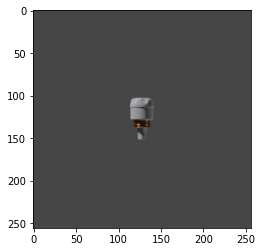

In [16]:
rgb_data = png2rgb("C:/dev/tmp/output/object01_render0120.png")

fig = plt.figure()
plt.imshow(rgb_data)
plt.show()